In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/캡스톤/Final_Data.csv')
df.head()

,Movie,Summary,Genre,Emotion,4Emotion,PN,CS,Instrument
0,천하장사마돈나,"Two people sit on a bench, one taking pictures...",드라마,-3,D,0,1,키보드
1,천하장사마돈나,"During an English class, a camera captures the...",판타지,3,A,1,1,키보드
2,천하장사마돈나,A person named Dong-gu is sitting at a desk an...,판타지,4,A,1,1,음율타악기
3,천하장사마돈나,A teacher and student embrace after the studen...,판타지,2,B,1,0,키보드
4,천하장사마돈나,A student named Dong-gu is excited to see his ...,로맨스,1,B,1,0,키보드


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie       2999 non-null   object
 1   Summary     2999 non-null   object
 2   Genre       2999 non-null   object
 3   Emotion     2999 non-null   int64 
 4   4Emotion    2999 non-null   object
 5   PN          2999 non-null   int64 
 6   CS          2999 non-null   int64 
 7   Instrument  2999 non-null   object
dtypes: int64(3), object(5)
memory usage: 187.6+ KB


## 한글 폰트 설정

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 장르 분포

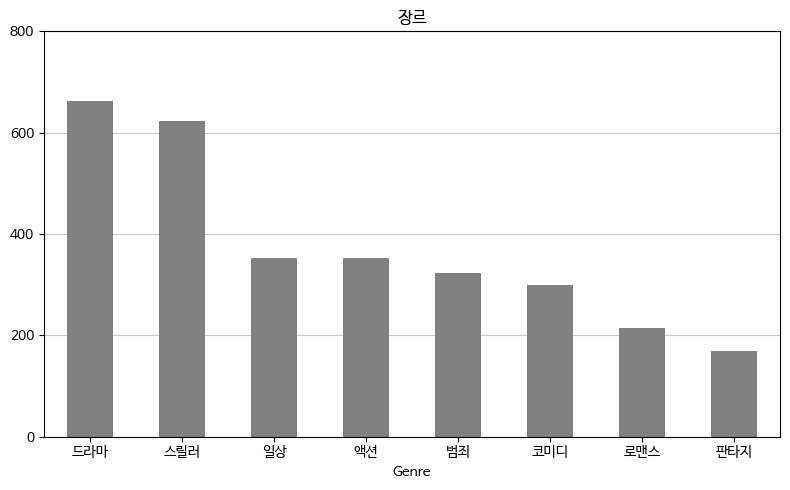

In [33]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(8, 5))
genre_counts.plot(kind='bar',color = 'gray',zorder=2)
plt.title('장르')
plt.xticks(rotation=0)
plt.yticks(range(0,801,200))
plt.grid(axis='y', linestyle='-',alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

## 감정 분포

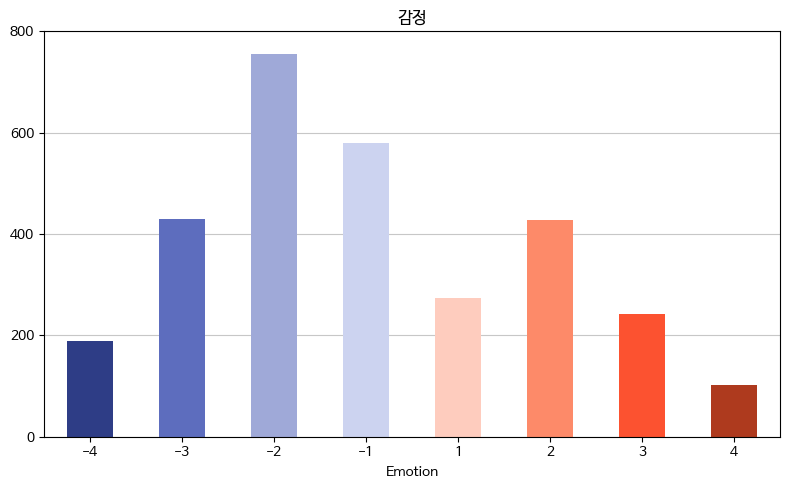

In [34]:
ordered_index=[-4,-3,-2,-1,1,2,3,4]
emotion_counts = df['Emotion'].value_counts()
ordered_emotion_counts = emotion_counts.reindex(ordered_index, fill_value=0)
colors = ['#2e3d86','#5d6dbe','#9fa9d8','#ccd3f0','#feccbe','#fd8a69','#fc5230','#ae3a1e']
plt.figure(figsize=(8, 5))
ordered_emotion_counts.plot(kind='bar',color = colors,zorder=2)
plt.title('감정')
plt.xticks(rotation=0)
plt.yticks(range(0,801,200))
plt.grid(axis='y', linestyle='-',alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

## 악기 분포

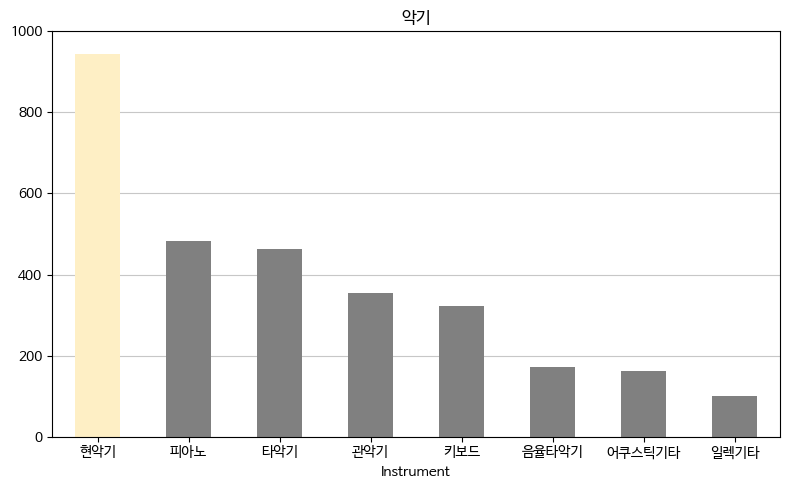

In [38]:
instrument_counts = df['Instrument'].value_counts()
colors = ['#feefc5' if count == max(instrument_counts) else 'gray' for count in instrument_counts]

plt.figure(figsize=(8, 5))
instrument_counts.plot(kind='bar',color = colors,zorder=2)
plt.title('악기')
plt.xticks(rotation=0)
plt.yticks(range(0,1001,200))
plt.grid(axis='y', linestyle='-',alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

## 장르별 감정의 분포

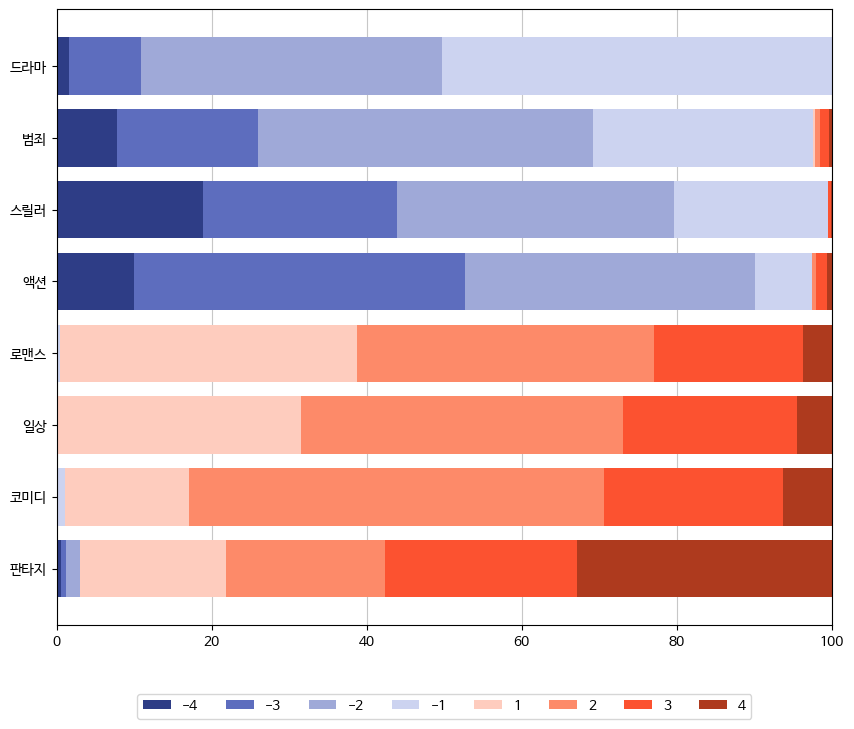

In [70]:
# To sort the order of x-axis from -4 to 4, we first need to convert the emotion categories to ordered categorical type
df['Emotion'] = pd.Categorical(df['Emotion'], categories=[-4, -3, -2, -1, 1, 2, 3, 4], ordered=True)

# Now, we recalculate the emotion_distribution using the ordered categorical
emotion_distribution = df.groupby(['Genre', 'Emotion']).size().unstack(fill_value=0)
emotion_distribution_percent = emotion_distribution.div(emotion_distribution.sum(axis=1), axis=0) * 100

# We ensure the dataframe is sorted by the 'ordered_index' for the y-axis
ordered_index=['판타지','코미디','일상','로맨스','액션','스릴러','범죄','드라마']
emotion_distribution_percent = emotion_distribution_percent.reindex(ordered_index)

# Now we plot the sorted dataframe
fig, ax = plt.subplots(figsize=(10, 8))

# Use the specified color mapping for emotions
colors = ['#2e3d86', '#5d6dbe', '#9fa9d8', '#ccd3f0', '#feccbe', '#fd8a69', '#fc5230', '#ae3a1e']
# Convert emotion categories to string to display on the legend properly
emotion_labels = [str(e) for e in df['Emotion'].cat.categories]

cumulative = np.zeros(len(emotion_distribution_percent))

# Plotting each emotion category
for i, emotion in enumerate(df['Emotion'].cat.categories):
    color = colors[i]
    ax.barh(emotion_distribution_percent.index,
            emotion_distribution_percent[emotion],
            color=color,
            left=cumulative,
            label=emotion_labels[i],
            zorder=2)
    cumulative += emotion_distribution_percent[emotion].values

ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1), ncol=8)
plt.grid(axis='x', linestyle='-',alpha=0.7, zorder=1)

plt.show()

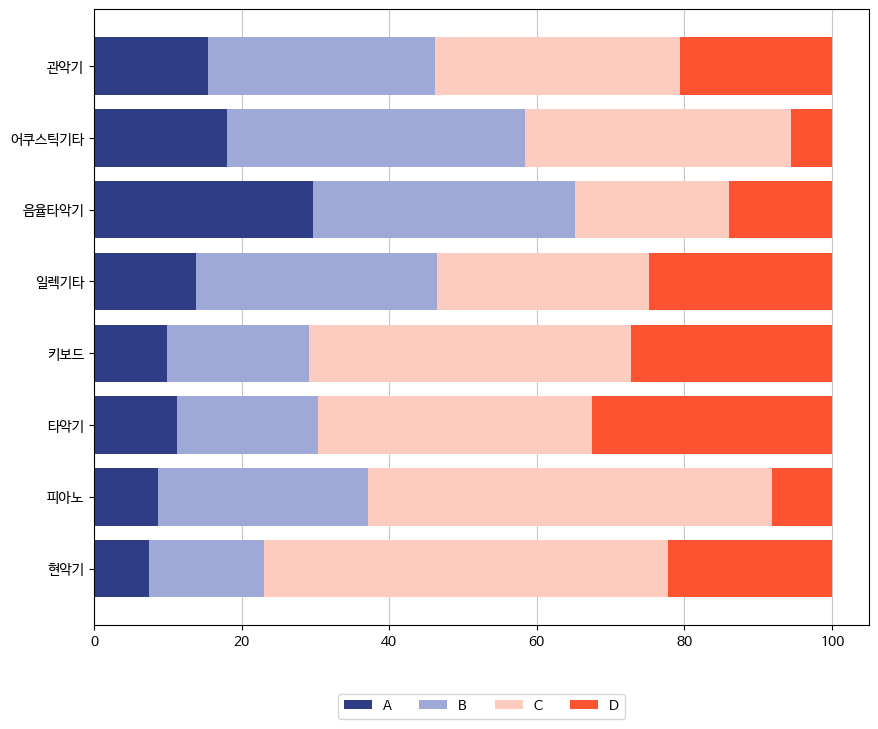

In [73]:
# To sort the order of x-axis from -4 to 4, we first need to convert the emotion categories to ordered categorical type
df['4Emotion'] = pd.Categorical(df['4Emotion'], categories=['A','B','C','D'], ordered=True)

# Now, we recalculate the emotion_distribution using the ordered categorical
emotion_distribution = df.groupby(['Instrument', '4Emotion']).size().unstack(fill_value=0)
emotion_distribution_percent = emotion_distribution.div(emotion_distribution.sum(axis=1), axis=0) * 100

# We ensure the dataframe is sorted by the 'ordered_index' for the y-axis
ordered_index=['현악기','피아노','타악기','키보드','일렉기타','음율타악기','어쿠스틱기타','관악기']
emotion_distribution_percent = emotion_distribution_percent.reindex(ordered_index)

# Now we plot the sorted dataframe
fig, ax = plt.subplots(figsize=(10, 8))

# Use the specified color mapping for emotions
colors = ['#2e3d86', '#9fa9d8', '#feccbe' ,'#fc5230']
# Convert emotion categories to string to display on the legend properly
emotion_labels = [str(e) for e in df['4Emotion'].cat.categories]

cumulative = np.zeros(len(emotion_distribution_percent))

# Plotting each emotion category
for i, emotion in enumerate(df['4Emotion'].cat.categories):
    color = colors[i]
    ax.barh(emotion_distribution_percent.index,
            emotion_distribution_percent[emotion],
            color=color,
            left=cumulative,
            label=emotion_labels[i],
            zorder=2)
    cumulative += emotion_distribution_percent[emotion].values

ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1), ncol=8)
plt.grid(axis='x', linestyle='-',alpha=0.7, zorder=1)

plt.show()